# Import packages

In [1]:
import numpy as np  # mathematical functions
import pandas as pd  # data frame manipulation
import matplotlib.pyplot as plt  # visualization
import seaborn as sns  # visualization
from sklearn.cluster import KMeans #clustering by k-means
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# If error appears /ModuleNotFoundError: No module named 'yellowbrick'/ => add code /!pip install yellowbrick/
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer #support to define k in k-means
from matplotlib.colors import ListedColormap #plot with colorful diagrams
sns.set()  # formating visualization

%matplotlib inline

# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# Import data

In [2]:
# import data
market=pd.read_csv('Dataset 1_origin.csv')
market.info()
market.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

# 1. Data Cleaning

## 1.1. Remove Unused Features

In [3]:
# count Z_CostContact
market['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [4]:
# delete the column 'Z_CostContact' without having to reassign, axis = 1 means column
market.drop('Z_CostContact', axis=1, inplace=True)

In [5]:
# count Z_Revenue
market['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [6]:
# delete the column 'Z_Revenue' without having to reassign, axis = 1 means column
market.drop('Z_Revenue', axis=1, inplace=True)

## 1.2. Duplicates

In [7]:
# count ID
market['ID'].value_counts()

5524     1
6885     1
3478     1
7494     1
1763     1
7250     1
2005     1
10770    1
2072     1
9743     1
9463     1
6318     1
4093     1
5751     1
3340     1
3594     1
5763     1
5529     1
2174     1
5286     1
4706     1
4070     1
25       1
3697     1
217      1
4220     1
9559     1
2939     1
2849     1
7787     1
3102     1
5868     1
8370     1
9988     1
3584     1
3643     1
851      1
125      1
2408     1
202      1
7998     1
830      1
3536     1
6050     1
3463     1
7706     1
2804     1
3745     1
9771     1
451      1
10530    1
1079     1
11110    1
10795    1
1998     1
8643     1
4278     1
3887     1
10380    1
6310     1
1490     1
2853     1
3865     1
9264     1
9451     1
9        1
486      1
10128    1
3967     1
4864     1
9672     1
4406     1
2428     1
4098     1
5824     1
7000     1
2561     1
5229     1
4086     1
8254     1
3388     1
2836     1
8418     1
1362     1
7152     1
10033    1
9349     1
5654     1
10341    1
524      1
6376     1

## 1.3. Missing values

In [8]:
# statistics of Income
market['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [9]:
# calculate median income
Income_median=market['Income'].median()
Income_median

51381.5

In [10]:
# fill null by median in 'Income' feature
market['Income']=market['Income'].fillna(Income_median)

## 1.4. Data Storage

In [11]:
# store the file
market.to_csv('clean_market.csv', index=False)

# 2. Exploratory Data Analysis

In [12]:
# import data
market_clean = pd.read_csv('clean_market.csv')
market_clean.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0

## 2.1. Outliers detection

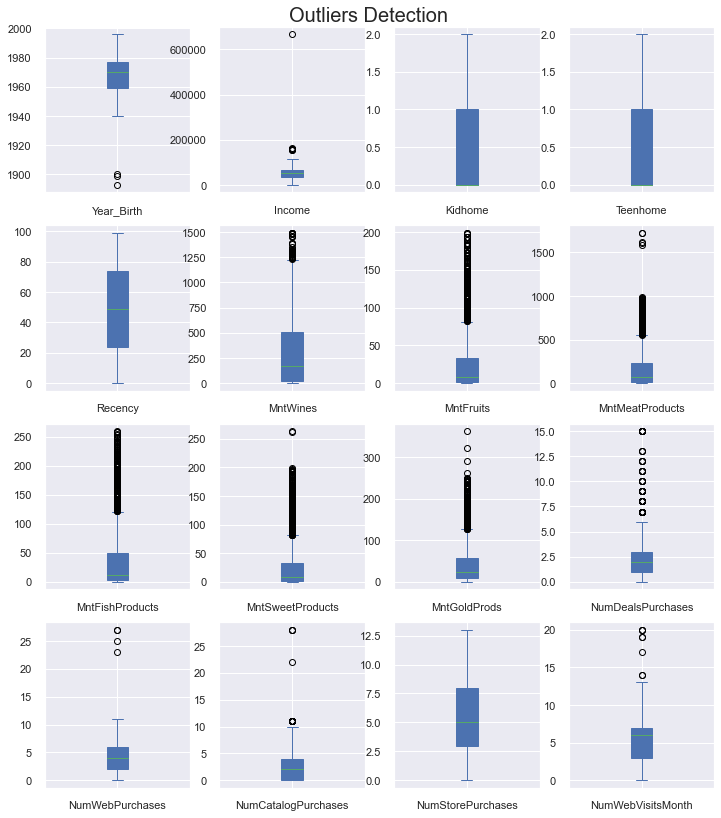

In [13]:
# Plot the approriate variables
market_clean_drop = market_clean.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                               'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
market_clean_drop.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Outliers Detection', fontsize=20, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

### Year_Birth

In [14]:
# statistics of Year_Birth
market_clean['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [15]:
# filter rows whose Year of Birth are large
market_clean.loc[lambda df: df['Year_Birth'] < 1920]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
192  26-09-2013       99        15          6                8   
239  17-05-2014       23         8          0                5   
339  26-09-2013       36       755        144              562   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
192                7                 4            25                  1   
239                7                 0             2                  1   
339              104                64           224                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192                2                    1                  2   
239                1                    0                  2   
339                4                    6                  4   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
192                  5             0             0             0   
239                  4             0             0             0   
339                  1             0             0             1   

     AcceptedCmp1  AcceptedCmp2  Complain  Response  
192             0             0         1         0  
239             0             0         0         0  
339             0             0         0         0

### Income

In [16]:
# statistics of Income
market_clean['Income'].describe()

# filter rows whose income are super high
market_clean.loc[lambda df: df['Income'] >= 600000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2233         0  02-06-2013       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2233                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2233                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
2233             0             0         0         0

In [17]:
# filter rows whose income are super high
market_clean.loc[lambda df: df['Income'] >= 600000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2233         0  02-06-2013       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2233                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2233                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
2233             0             0         0         0

In [18]:
# remove outliers
market_clean = (market_clean
    .loc[lambda df: df['Year_Birth'] > 1920]
    .loc[lambda df: df['Income'] < 600000]
)

In [19]:
# store the file for forecasting
market_clean.to_csv('forecast_market.csv', index=False)

## 2.2. Add & Remove Features

### Add Features

In [21]:
market['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [20]:
# change datatype of 'Dt_Customer'
market_clean['Dt_Customer'] = pd.to_datetime(market_clean['Dt_Customer'])

In [23]:
# separate 'Dt_Customer' into weekday/month/quarter/year
market_clean['Dt_Cus_weekday'] = market_clean['Dt_Customer'].dt.weekday
market_clean['Dt_Cus_month'] = market_clean['Dt_Customer'].dt.month
market_clean['Dt_Cus_quarter'] = market_clean['Dt_Customer'].dt.quarter
market_clean['Dt_Cus_year'] = market_clean['Dt_Customer'].dt.year

# Membership days from enrolled date to latest enrolled date 
market_clean['Membership_day'] = market_clean['Dt_Customer'].max() - market_clean['Dt_Customer']

# Total children
market_clean['Total_children'] = market_clean['Kidhome'] + market_clean['Teenhome']

# Total amount of spending per customer in 2 - year period
market_clean['Total_Mnt'] = market_clean['MntWines'] + market_clean['MntFruits'] + market_clean['MntMeatProducts']
+ market_clean['MntFishProducts'] + market_clean['MntSweetProducts'] + market_clean['MntGoldProds']

# Total number of purchasing times per customer in 2 - year period
market_clean['Total_purchases'] = market_clean['NumDealsPurchases'] + market_clean['NumWebPurchases'] 
+ market_clean['NumCatalogPurchases'] + market_clean['NumStorePurchases']

# Total number of accepted campaigns
market_clean['Total_accepted_cpm'] = market_clean['AcceptedCmp1'] + market_clean['AcceptedCmp2'] + market_clean['AcceptedCmp3'] 
+ market_clean['AcceptedCmp4'] + market_clean['AcceptedCmp5'] + market_clean['Response']

# Covert living status into 2 types: Together and Single
market_clean['Living_Status'] = market_clean['Marital_Status'].replace({"Married":"Together", "Divorced":"Single", "Widow":"Single",
                                                                        "Alone":"Single", "Absurd":"Single", "YOLO":"Single"})

# Number of family members
market_clean['Adult_num']=market_clean['Living_Status'].replace({"Together": 2, "Single": 1})
market_clean['Family_size'] = market_clean['Adult_num'] + market_clean['Total_children']

# Age is calculated from BOY to the latest enrolled date 
market_clean['Age'] = market_clean['Dt_Cus_year'].max() - market_clean['Year_Birth']

### Remove

In [24]:
# Drop sub-features
market_clean.drop(['Year_Birth','Dt_Customer','Marital_Status','Kidhome','Teenhome','Adult_num'] , axis=1, inplace=True)

In [25]:
# Change datatype of 'Membership_day' to int
market_clean['Membership_day'] =market_clean['Membership_day'].dt.days

In [26]:
#check
market_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Education            2236 non-null   object 
 2   Income               2236 non-null   float64
 3   Recency              2236 non-null   int64  
 4   MntWines             2236 non-null   int64  
 5   MntFruits            2236 non-null   int64  
 6   MntMeatProducts      2236 non-null   int64  
 7   MntFishProducts      2236 non-null   int64  
 8   MntSweetProducts     2236 non-null   int64  
 9   MntGoldProds         2236 non-null   int64  
 10  NumDealsPurchases    2236 non-null   int64  
 11  NumWebPurchases      2236 non-null   int64  
 12  NumCatalogPurchases  2236 non-null   int64  
 13  NumStorePurchases    2236 non-null   int64  
 14  NumWebVisitsMonth    2236 non-null   int64  
 15  AcceptedCmp3         2236 non-null   i

In [27]:
# check Dt_Cus_weekday
market_clean['Dt_Cus_weekday'].value_counts()

6    344
2    333
3    315
1    315
0    313
4    313
5    303
Name: Dt_Cus_weekday, dtype: int64

In [28]:
# check Dt_Cus_month
market_clean['Dt_Cus_month'].value_counts()

8     211
10    209
3     202
12    202
1     191
5     191
2     186
11    185
4     184
6     170
9     164
7     141
Name: Dt_Cus_month, dtype: int64

In [29]:
# check Dt_Cus_quarter
market_clean['Dt_Cus_quarter'].value_counts()

4    596
1    579
2    545
3    516
Name: Dt_Cus_quarter, dtype: int64

In [30]:
# check Membership_day
market_clean['Membership_day'].value_counts()

827     12
660     11
1       11
727     11
198     10
473     10
258      9
216      9
768      9
673      9
337      9
404      8
841      8
829      8
513      8
197      8
816      8
581      8
396      8
462      8
743      8
31       8
836      8
370      8
1000     8
640      8
516      7
664      7
304      7
602      7
658      7
378      7
605      7
264      7
157      7
314      7
407      7
609      7
251      7
431      7
654      7
661      7
563      7
850      7
689      7
387      6
970      6
362      6
728      6
724      6
688      6
191      6
593      6
226      6
568      6
434      6
786      6
813      6
252      6
940      6
411      6
692      6
643      6
805      6
483      6
361      6
753      6
809      6
565      6
386      6
237      6
608      6
880      6
416      6
784      6
849      6
392      6
597      6
495      5
939      5
588      5
552      5
400      5
492      5
294      5
543      5
697      5
232      5
541      5
445      5
766      5

In [31]:
# check Age
market_clean['Age'].value_counts()

38    89
43    87
39    83
42    79
36    77
44    77
49    74
41    74
45    71
40    69
58    55
56    53
35    53
62    52
46    51
37    51
55    51
48    50
60    50
59    49
54    49
32    45
51    45
47    44
52    44
57    43
63    43
31    42
28    42
50    42
34    39
33    39
30    38
53    36
61    35
29    32
25    30
65    30
64    29
26    29
27    27
66    21
24    18
68    16
67    16
23    15
22    13
69     8
71     7
70     7
21     5
19     5
20     3
18     2
73     1
74     1
Name: Age, dtype: int64

## 2.3. Convert to numerical

In [32]:
# one-hot encoding
market_onehot = pd.get_dummies(market_clean)
market_onehot

ID    Income  Recency  MntWines  MntFruits  MntMeatProducts  \
0      5524   58138.0       58       635         88              546   
1      2174   46344.0       38        11          1                6   
2      4141   71613.0       26       426         49              127   
3      6182   26646.0       26        11          4               20   
4      5324   58293.0       94       173         43              118   
5      7446   62513.0       16       520         42               98   
6       965   55635.0       34       235         65              164   
7      6177   33454.0       32        76         10               56   
8      4855   30351.0       19        14          0               24   
9      5899    5648.0       68        28          0                6   
10     1994   51381.5       11         5          5                6   
11      387    7500.0       59         6         16               11   
12     2125   63033.0       82       194         61              480   
13     8180   59354.0       53       233          2               53   
14     2569   17323.0       38         3         14               17   
15     2114   82800.0       23      1006         22              115   
16     9736   41850.0       51        53          5               19   
17     4939   37760.0       20        84          5               38   
18     6565   76995.0       91      1012         80              498   
19     2278   33812.0       86         4         17               19   
20     9360   37040.0       41        86          2               73   
21     5376    2447.0       42         1          1             1725   
22     1993   58607.0       63       867          0               86   
23     4047   65324.0        0       384          0              102   
24     1409   40689.0       69       270          3               27   
25     7892   18589.0       89         6          4               25   
26     2404   53359.0        4       173          4               30   
27     5255   51381.5       19         5          1                3   
28     9422   38360.0       26        36          2               42   
29     1966   84618.0       96       684        100              801   
30     6864   10979.0       34         8          4               10   
31     3033   38620.0       56       112         17               44   
32     5710   40548.0       31       110          0                5   
33     7373   46610.0        8        96         12               96   
34     8755   68657.0        4       482         34              471   
35    10738   49389.0       55        40          0               19   
36     4339   67353.0       37       702         17              151   
37    10755   23718.0       76         6          3               14   
38     8595   42429.0       99        55          0                6   
39     2968   48948.0       53       437          8              206   
40     8601   80011.0        3       421         76              536   
41      503   20559.0       88        13          1               29   
42     8430   21994.0        4         9          0                6   
43     7281   51381.5       80        81         11               50   
44     2139    7500.0       19         3          1               10   
45     1371   79941.0       72       123        164              266   
46     9909    7500.0       24         3         18               14   
47     7286   41728.0       92        13          6               15   
48     7244   51381.5       96        48          5               48   
49     6566   72550.0       39       826         50              317   
50     8614   65486.0       29       245         19              125   
51     4114   79143.0        2       650         37              780   
52     1331   35790.0       54        12          6               20   
53     2225   82582.0       54       510        120              550   
54     9381   66373.0       57       328         

## 2.4. Correlation

In [33]:
# compute the correlation matrix
market_corr = market_onehot.corr()
market_corr

ID    Income   Recency  MntWines  MntFruits  \
ID                      1.000000  0.000869 -0.046300 -0.020726   0.007247   
Income                  0.000869  1.000000  0.007829  0.686080   0.504911   
Recency                -0.046300  0.007829  1.000000  0.016321  -0.003717   
MntWines               -0.020726  0.686080  0.016321  1.000000   0.388472   
MntFruits               0.007247  0.504911 -0.003717  0.388472   1.000000   
MntMeatProducts        -0.002274  0.684176  0.023446  0.561886   0.542030   
MntFishProducts        -0.022903  0.518462  0.001314  0.398956   0.594415   
MntSweetProducts       -0.006112  0.518126  0.022796  0.385845   0.567030   
MntGoldProds           -0.010339  0.383548  0.017168  0.386234   0.389999   
NumDealsPurchases      -0.037393 -0.107169 -0.000638  0.011173  -0.131792   
NumWebPurchases        -0.017712  0.450584 -0.010776  0.542136   0.296986   
NumCatalogPurchases    -0.001592  0.693781  0.025226  0.634716   0.487274   
NumStorePurchases      -0.013613  0.628075  0.000771  0.642313   0.463136   
NumWebVisitsMonth      -0.008256 -0.646382 -0.021850 -0.320287  -0.417405   
AcceptedCmp3           -0.035823 -0.015064 -0.033095  0.062103   0.014945   
AcceptedCmp4           -0.025150  0.217659  0.018779  0.373491   0.010363   
AcceptedCmp5           -0.004916  0.394308  0.000844  0.471949   0.211996   
AcceptedCmp1           -0.021392  0.325254 -0.019367  0.354328   0.195351   
AcceptedCmp2           -0.014970  0.104062 -0.001811  0.206031  -0.009717   
Complain                0.031580 -0.027871  0.005361 -0.035974  -0.002813   
Response               -0.021596  0.161121 -0.198781  0.247280   0.125854   
Dt_Cus_weekday          0.013663 -0.009332  0.045333 -0.008734   0.063362   
Dt_Cus_month            0.029342  0.000163 -0.006985  0.038879   0.000413   
Dt_Cus_quarter          0.020767 -0.002235  0.003220  0.038074  -0.000252   
Dt_Cus_year            -0.007477  0.026504 -0.025544 -0.153847  -0.054834   
Membership_day         -0.004006 -0.027775  0.030134  0.147480   0.059440   
Total_children         -0.001024 -0.340550  0.017826 -0.351522  -0.394121   
Total_Mnt              -0.015359  0.789375  0.020842  0.891696   0.613122   
Total_purchases        -0.022198  0.666325  0.005871  0.712803   0.456026   
Total_accepted_cpm     -0.035773  0.342081 -0.088973  0.488823   0.172027   
Family_size             0.009943 -0.284783  0.012891 -0.295195  -0.340465   
Age                    -0.002659  0.198835  0.019396  0.162809   0.013657   
Education_2n Cycle     -0.003767 -0.062707 -0.008931 -0.097209   0.023249   
Education_Basic        -0.009340 -0.232565 -0.003651 -0.138789  -0.060069   
Education_Graduation    0.018677  0.009854  0.032814 -0.058704   0.114465   
Education_Master       -0.025443  0.019640 -0.023530  0.038305  -0.051821   
Education_PhD           0.006376  0.100484 -0.011035  0.155840  -0.085899   
Living_Status_Single   -0.020460  0.004738  0.003573  0.007237   0.026118   
Living_Status_Together  0.020460 -0.004738 -0.003573 -0.007237  -0.026118   

                        MntMeatProducts  MntFishProducts  MntSweetProducts  \
ID                            -0.002274        -0.022903         -0.006112   
Income                         0.684176         0.518462          0.518126   
Recency                        0.023446         0.001314          0.022796   
MntWines                       0.561886         0.398956          0.385845   
MntFruits                      0.542030         0.594415          0.567030   
MntMeatProducts                1.000000         0.567813          0.523329   
MntFishProducts                0.567813         1.000000          0.579490   
MntSweetProducts               0.523329         0.579490          1.000000   
MntGoldProds                   0.348727         0.422018          0.369084   
NumDealsPurchases             -0.122242        -0.139263         -0.120064   
NumWebPurchases                0.293502         0.293424          0.348236   
NumCatalogPur

In [34]:
# plot all variables except ID
market_corr_plot = market_corr.drop(['ID'], axis=1)

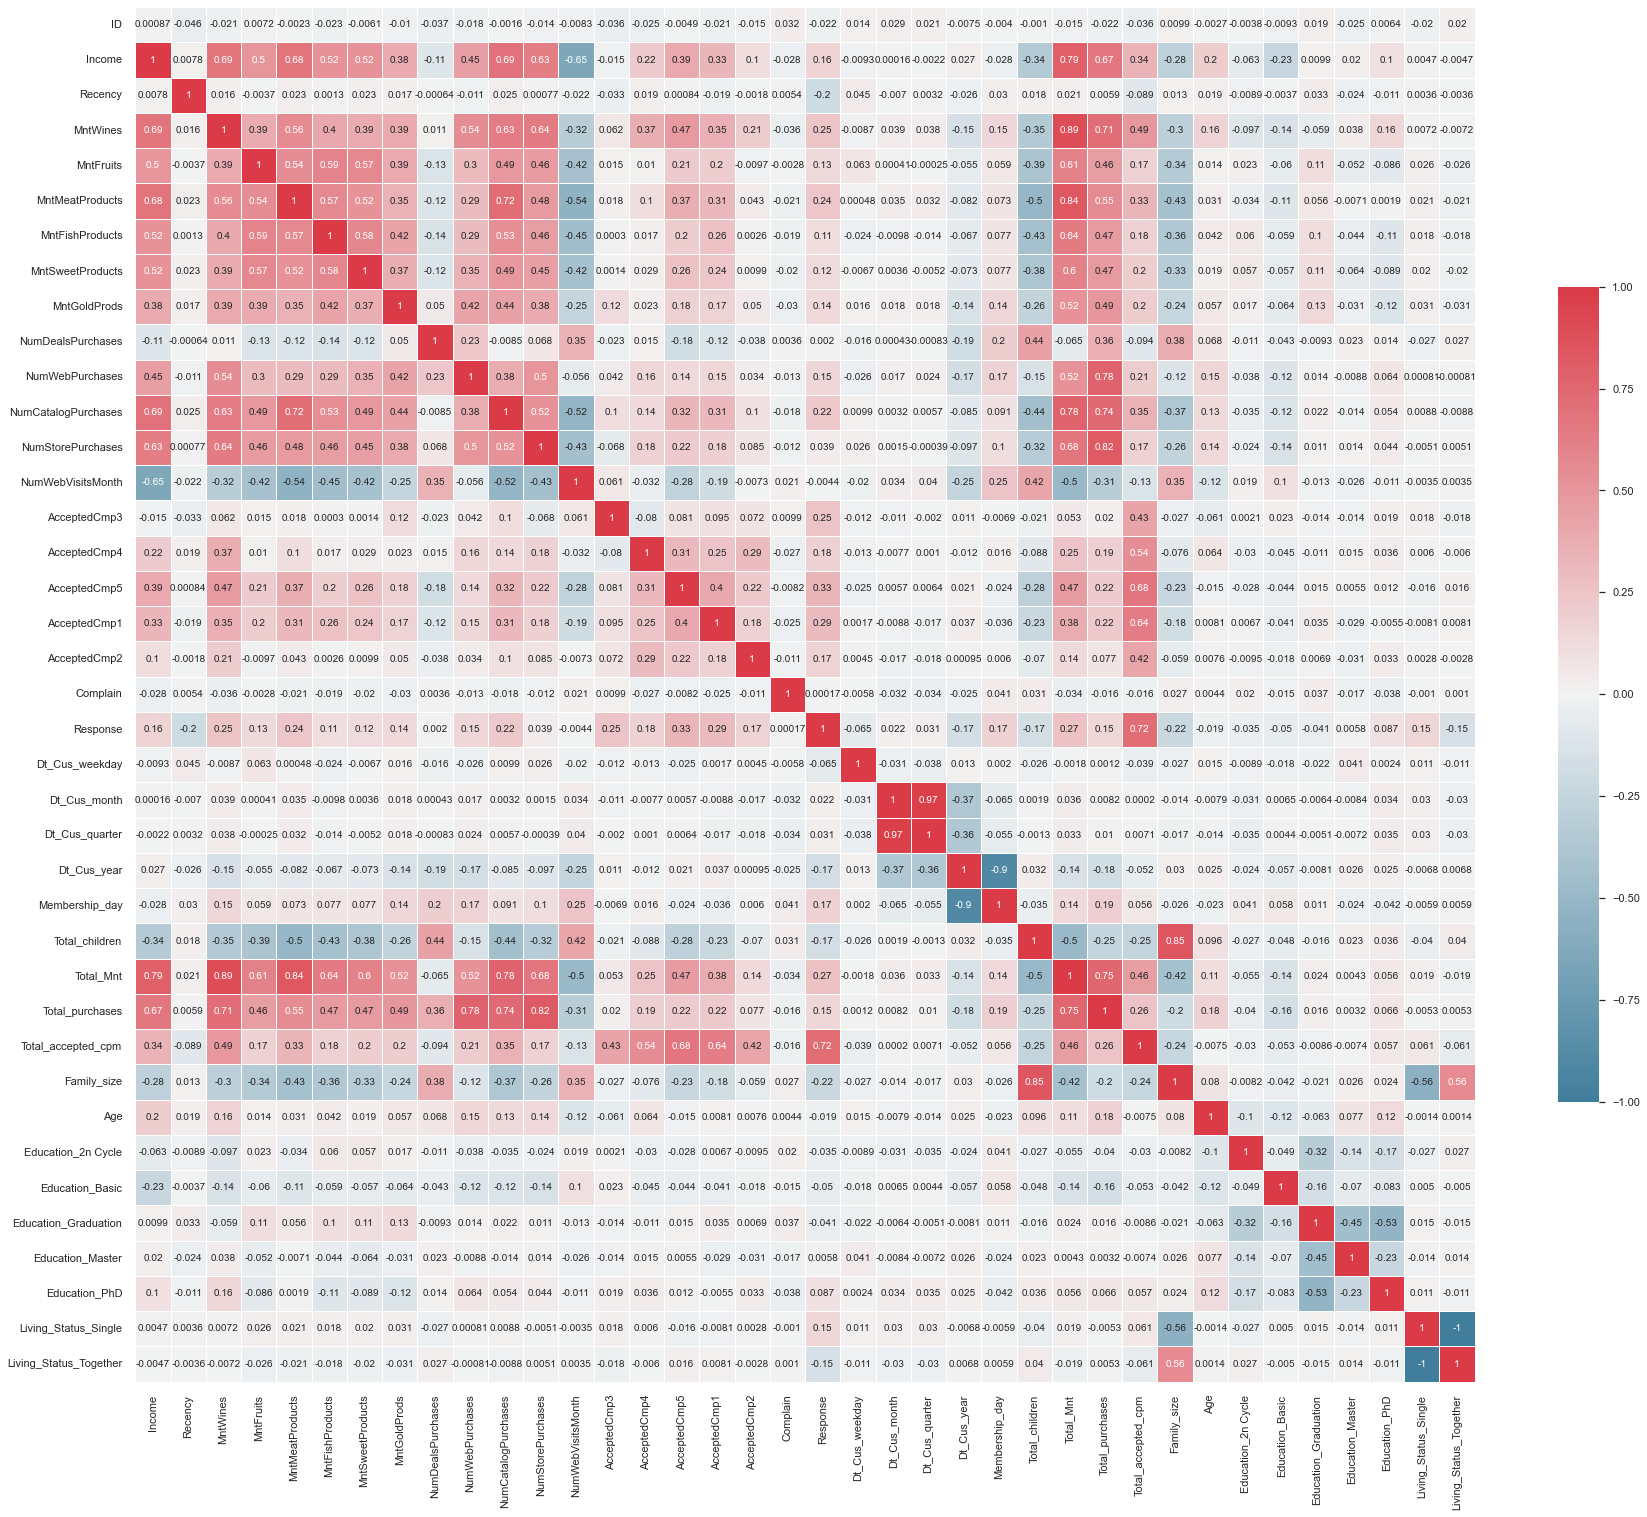

In [38]:
# plot
mask = np.triu(np.ones_like(market_corr_plot, dtype=bool))
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(market_corr_plot,annot = True, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.savefig('corplots.png', bbox_inches='tight')

## 2.5. Normalization

In [35]:
# z-score nomalization
market_z = (market_onehot - market_onehot.mean()) / market_onehot.std()
market_z.head()

ID    Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0 -0.020035  0.288882  0.306787  0.983008   1.553823         1.679371   
1 -1.052447 -0.261944 -0.383885 -0.870869  -0.636289        -0.713296   
2 -0.446251  0.918218 -0.798289  0.362078   0.572049        -0.177161   
3  0.182750 -1.181919 -0.798289 -0.870869  -0.560768        -0.651264   
4 -0.081671  0.296121  1.549998 -0.389574   0.421006        -0.217039   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0         2.460518          1.475066      0.845480           0.348660   
1        -0.650268         -0.631497     -0.729579          -0.168662   
2         1.344295         -0.147229     -0.038090          -0.685984   
3        -0.503878         -0.583070     -0.748787          -0.168662   
4         0.154876         -0.001949     -0.556706           1.383305   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0         1.407324             2.509240          -0.552306           0.692710   
1        -1.110673            -0.568843          -1.167477          -0.131392   
2         1.407324            -0.226833           1.293207          -0.543443   
3        -0.750959            -0.910852          -0.552306           0.280659   
4         0.328183             0.115176           0.062865          -0.131392   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0     -0.280348     -0.284041     -0.279419     -0.262303      -0.11659   
1     -0.280348     -0.284041     -0.279419     -0.262303      -0.11659   
2     -0.280348     -0.284041     -0.279419     -0.262303      -0.11659   
3     -0.280348     -0.284041     -0.279419     -0.262303      -0.11659   
4     -0.280348     -0.284041     -0.279419     -0.262303      -0.11659   

   Complain  Response  Dt_Cus_weekday  Dt_Cus_month  Dt_Cus_quarter  \
0  -0.09498  2.385805       -1.503415     -0.717375       -0.442581   
1  -0.09498 -0.418958        1.481610      0.421057        0.433957   
2  -0.09498 -0.418958       -0.508406      0.421057        0.433957   
3  -0.09498 -0.418958       -0.010902      0.990272        1.310495   
4  -0.09498 -0.418958        1.481610     -1.571198       -1.319120   

   Dt_Cus_year  Membership_day  Total_children  Total_Mnt  Total_purchases  \
0    -1.500646        1.975025       -1.264025   1.679801         1.319045   
1     1.419671       -1.666644        1.394827  -0.961987        -1.155599   
2    -0.040487       -0.172957       -1.264025   0.282478         0.798067   
3     1.419671       -1.924918        0.065401  -0.918788        -0.895110   
4     1.419671       -0.822947        0.065401  -0.305694         0.537579   

   Total_accepted_cpm  Family_size       Age  Education_2n Cycle  \
0            0.620318    -1.758416  1.016641           -0.314209   
1           -0.501875     0.445518  1.272979           -0.314209   
2           -0.501875    -0.656449  0.333072           -0.314209   
3           -0.501875     0.445518 -1.290405           -0.314209   
4           -0.501875     0.445518 -1.034066           -0.314209   

   Education_Basic  Education_Graduation  Education_Master  Education_PhD  \
0         -0.15728              0.992648         -0.445193      -0.526176   
1         -0.15728              0.992648         -0.445193      -0.526176   
2         -0.15728              0.992648         -0.445193      -0.526176   
3         -0.15728              0.992648         -0.445193      -0.526176   
4         -0.15728             -1.006956         -0.445193       1.899656   

   Living_Status_Single  Living_Status_Together  
0              1.347334               -1.347334  
1              1.347334               -1.347334  
2             -0.741875                0.741875  
3             -0.741875                0.741875  
4             -0.741875                0.741875

## 2.6. PCA

In [89]:
#Initiating PCA to reduce dimentions features to 2
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(market_z)
market_pca = pd.DataFrame(pca.transform(market_z), columns=(["PC1","PC2"]))
market_pca.describe()

PC1           PC2
count  2.236000e+03  2.236000e+03
mean   1.449844e-17  5.362437e-17
std    2.946256e+00  1.672703e+00
min   -5.251849e+00 -5.205892e+00
25%   -2.645489e+00 -1.125153e+00
50%   -7.796501e-01 -8.109231e-02
75%    2.279843e+00  1.082473e+00
max    9.245400e+00  6.414410e+00

# 3. Clustering

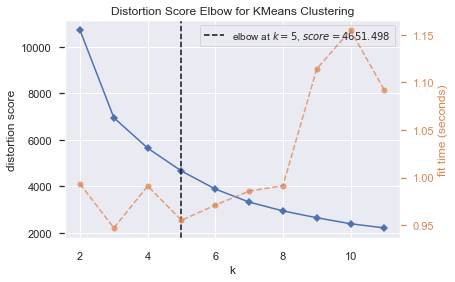

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [90]:
# Quick examination of elbow method to find numbers of clusters to make
kmeans = KElbowVisualizer(KMeans(), k=11)
kmeans.fit(market_pca)
kmeans.show()

In [91]:
# fit kmeans to dataset
kmeans_fit = KMeans(n_clusters=5, random_state=0)
clr = kmeans_fit.fit_predict(market_pca)
# fit model to market_pca
market_pca['Cluster No.'] = clr
# fit model to market_clean
market_clean['Cluster No.'] = clr
market_pca.head()

PC1       PC2  Cluster No.
0  4.878468  0.087829            0
1 -2.909893 -1.815345            4
2  1.769177  0.623337            2
3 -2.923070 -0.834884            4
4 -0.465954  0.548689            1

In [70]:
# count clusters in percentage
pd.Series(kmeans_fit.labels_).value_counts(normalize=True)

0    0.327818
3    0.294723
2    0.294275
1    0.083184
dtype: float64

In [1]:
#Plotting countplot of clusters
plt.axes().set_facecolor("white")
pl = sns.countplot(
    x=market_pca['Cluster No.'],
    palette = ['firebrick']
)
pl.set_title("Distribution Of The Clusters", fontsize = 15)
pl.set_xlabel("Cluster")
pl.set_ylabel("Count")
plt.savefig('save.png', bbox_inches='tight')
plt.show()

NameError: name 'plt' is not defined

The clusters are quite distributed